# Visualization and Simple Regression models

In this notebook, we will visualize the Pantheon+ Type Ia supernova data to determine options to employ Regression to predict the absolute magnitude of a type Ia supernova given the redshift (and some other features if possible).

We will begin by plotting the absolute magnitude ($m_B$) against redshift ($z$).

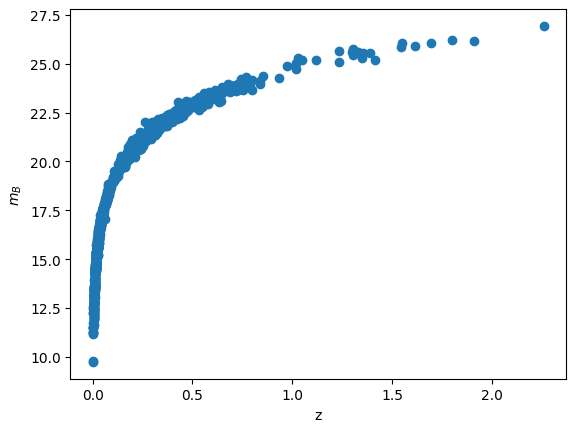

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
sys.path.append('../src')
from preprocessing import preprocessor_simple

pantheonpluspath = '../data/Pantheon+SH0ES.dat'

X1,Y1 = preprocessor_simple(pantheonpluspath)

plt.scatter(X1['zHD'],Y1)
plt.xlabel('z')
plt.ylabel('$m_B$')
plt.show()


### Ideas
We can see that the apparent magnitude varies logarithmically with redshift. There are two options we could explore : 
1. Use a polynomial regressor to fit the data.
2. Consider only the linear part of the graph ($\sim z > 0.5$) and use a linear regressor.

There is an obvious flaw with the second option as we can't predict apparent magnitudes of lower redshifts with a straight line fit. A polynomial regressor will probably give more accurate results.

## Simple Linear Regression
Let's take a look at the linear portion of the graph.

Text(0, 0.5, '$m_B$')

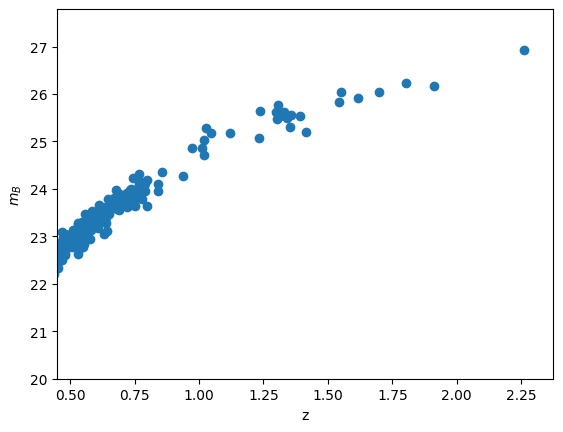

In [4]:
plt.scatter(X1['zHD'],Y1)
plt.xlim(left = 0.45)
plt.ylim(bottom = 20)
plt.xlabel('z')
plt.ylabel('$m_B$')

Upon closer inspection, the graph does not seem to be a good straight line. Nevertheless, we could try fitting a linear model to it.

0.17140965144399234


Text(0, 0.5, '$m_B$')

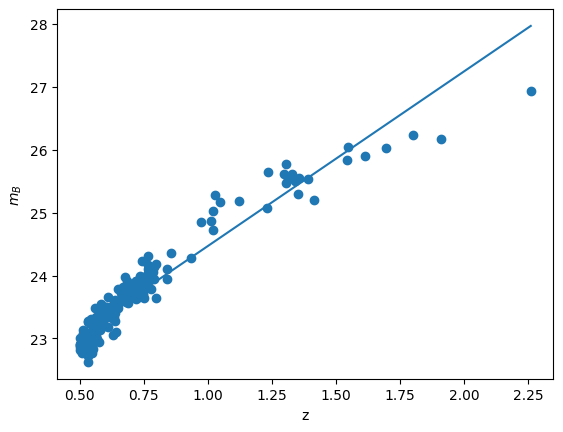

In [5]:
from regressors import linearregressor
from sklearn.metrics import mean_absolute_error
X2,Y2 = preprocessor_simple(pantheonpluspath, 0.5)
x2 = X2['zHD'].values.reshape(-1,1)
y2 = Y2.values.reshape(-1,1)

c,m = linearregressor(x2,y2,10000)

yvals = lambda z: m*z + c
print(mean_absolute_error(y2,yvals(x2)))
plt.plot(x2,yvals(x2))
plt.scatter(x2,y2)
plt.xlabel('z')
plt.ylabel('$m_B$')



We can see just from the plot that the fit is not that great. The mean absolute error is also very small, but that is because we are comparing it to the same dataset. It could become worse when tested against another dataset. 

## Simple Polynomial Regressor

We can try fitting the data to a polynomial regressor. We use a 5th degree polynomial to fit the data.

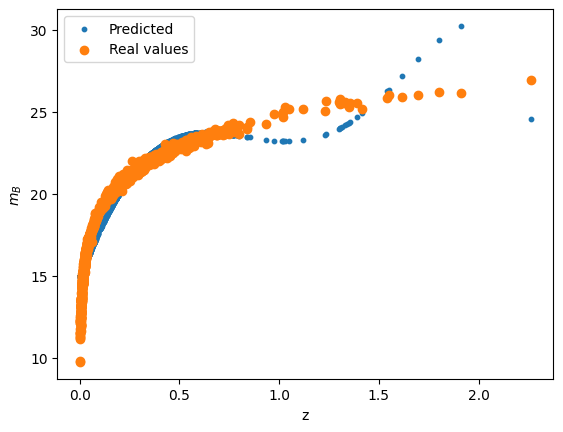

In [9]:
x1 = X1['zHD'].values.reshape(-1,1)
y1 = Y1.values.reshape(-1,1)
from regressors import thirdregressor
f, e,d,c,b,a = thirdregressor(x1,y1,100000, 0.05)
yvals2 = lambda z: f+e*z+ d*(z**2) + c*(z**3) + b*(z**4) + a*(z**5)

plt.scatter(x1,yvals2(x1), label = 'Predicted', s = 10)
plt.scatter(x1,y1, label = 'Real values')
plt.xlabel('z')
plt.ylabel('$m_B$')
plt.legend()



Even though the fit is better this time, it still doesn't capture the complete features of the curve.

We will use more standard regressors like those provided by scikit-learn for this project, to get better predictions and to be able to use more features.

## Conclusion

Even though the MAE of these models are small, the plots show that the models heaven't 'learnt' the proper variation of $m_B$ from the data and will give wrong predictions for higher redshifts. Using more features like the color ($c$) and stretch ($x_1$) could improve the predictions of the model.